<a href="https://colab.research.google.com/github/hoangviet-nguyen/bevri-abschluss-projekt/blob/main/projekt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%load_ext autoreload
%autoreload 2

from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

try:
    import jupyter_black

    jupyter_black.load()
except:
    print("black not installed")

# Projekt: Under Water Image Segmentation

In [29]:
import os
from pathlib import Path
import suim_set
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from torchvision.transforms.v2 import functional as TF
import torch
import torchshow as ts
import pandas as pd

## Download dataset: SUIM dataset

In [10]:
DATA_PATH = Path("./workspace/code/data")

if not os.path.exists(DATA_PATH):
    os.makedirs(DATA_PATH)
    suim_set.download(DATA_PATH)

## Data Inspection

The shape of the img is: (480, 584, 3)
The shape of the label img is: (480, 584, 3)


(np.float64(-0.5), np.float64(583.5), np.float64(479.5), np.float64(-0.5))

(np.float64(-0.5), np.float64(583.5), np.float64(479.5), np.float64(-0.5))

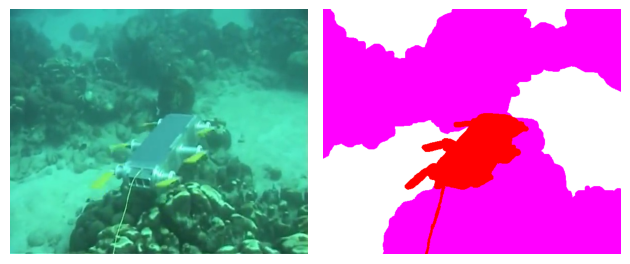

8

In [98]:
root_path = DATA_PATH.joinpath("train_val/train_val")
norm_img = Image.open(root_path.joinpath("images/d_r_1_.jpg"))
norm_img = np.array(norm_img)

label_img = Image.open(root_path.joinpath("masks/d_r_1_.bmp"))
labels = np.array(label_img) / 255
imgs = [norm_img, labels]

# Define the mapping dictionary
rgb_to_class = {
    (0, 0, 0): 0,  # Black - Background waterbody
    (0, 0, 255): 1,  # Blue - Human divers
    (0, 255, 0): 2,  # Green - Plants/sea-grass
    (0, 255, 255): 3,  # Sky blue - Wrecks/ruins
    (255, 0, 0): 4,  # Red - Robots/instruments
    (255, 0, 255): 5,  # Pink - Reefs/invertebrates
    (255, 255, 0): 6,  # Yellow - Fish and vertebrates
    (255, 255, 255): 7,  # White - Sea-floor and rocks
}


label_tensor = np.zeros(labels.shape[:2], dtype=np.int64)

for rgb, class_idx in rgb_to_class.items():
    label_tensor[np.where(labels == np.array(rgb))[0]] = class_idx

label_tensor = torch.tensor(label_tensor)

fig, axs = plt.subplots(ncols=2)
print(f"The shape of the img is: {norm_img.shape}")
print(f"The shape of the label img is: {labels.shape}")

for img, ax in zip(imgs, axs.flatten()):
    ax.imshow(img)
    ax.axis("off")

plt.tight_layout()
plt.show()

## Building a dataset

## Fully-Convolutional Network

## Model Metrics

## Suim-Net Model

## Model Comparison